# Measures branching in C++ from python

This all started with article [Why is it faster to process a sorted array than an unsorted array?](https://stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array/11227902#11227902). It compares different implementation fo the following function for which we try different implementations for the third line in next cell. The last option is taken
[Checking whether a number is positive or negative using bitwise operators](https://stackoverflow.com/questions/3779202/checking-whether-a-number-is-positive-or-negative-using-bitwise-operators) which avoids [branching](https://en.wikipedia.org/wiki/Branch_predictor).

In [1]:
# int nb = 0;
# for(auto it = values.begin(); it != values.end(); ++it)
#     if (*it >= th) nb++; // this line changes
#     if (*it >= th) nb++; // and is repeated 10 times inside the loop.
#     // ... 10 times
# return nb;

The third line is also repeated 10 times to avoid the loop being too significant. The code is available on github: [cbenchmark.cpp](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/cbenchmark.cpp) and
[repeat_fct.h](https://github.com/sdpython/cpyquickhelper/blob/master/src/cpyquickhelper/numbers/repeat_fct.h).

In [2]:
%matplotlib inline

In [3]:
from cpyquickhelper.numbers.cbenchmark import measure_scenario_A, measure_scenario_B
from cpyquickhelper.numbers.cbenchmark import measure_scenario_C, measure_scenario_D
from cpyquickhelper.numbers.cbenchmark import measure_scenario_E, measure_scenario_F
from cpyquickhelper.numbers.cbenchmark import measure_scenario_G, measure_scenario_H
from cpyquickhelper.numbers.cbenchmark import measure_scenario_I, measure_scenario_J

In [4]:
import pandas

def test_benchmark(label, values, th, repeat=10, number=20):
    funcs = [(k, v) for k, v in globals().copy().items() if k.startswith("measure_scenario")]
    rows = []
    for k, v in funcs:
        exe = v(values, th, repeat, number)
        d = exe.todict()
        d['doc'] = v.__doc__.split('``')[1]
        d['label'] = label
        d['name'] = k
        rows.append(d)        
    df = pandas.DataFrame(rows)
    return df

test_benchmark("sorted", list(range(10)), 5)

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,5.728500e-07,1.964198e-07,if (values[i] >= th) ++nb;,sorted,7.900000e-07,3.950000e-07,measure_scenario_A,20.0,10.0
1,5.728500e-07,1.966208e-07,if (*it >= th) ++nb;,sorted,7.910000e-07,3.950000e-07,measure_scenario_B,20.0,10.0
2,5.728500e-07,1.966208e-07,if (*it >= th) nb++;,sorted,7.910000e-07,3.950000e-07,measure_scenario_C,20.0,10.0
3,1.185500e-07,1.810882e-07,nb += *it >= th ? 1 : 0;,sorted,3.960000e-07,0.000000e+00,measure_scenario_D,20.0,10.0
4,5.728500e-07,1.965203e-07,if (*it >= th) nb += 1;,sorted,7.910000e-07,3.950000e-07,measure_scenario_E,20.0,10.0
5,1.777500e-07,1.965100e-07,nb += (*it - th) >= 0 ? 1 : 0;,sorted,3.950000e-07,0.000000e+00,measure_scenario_F,20.0,10.0
6,1.185500e-07,1.810882e-07,nb += (*it - th) < 0 ? 1 : 0;,sorted,3.960000e-07,0.000000e+00,measure_scenario_G,20.0,10.0
7,9.875000e-08,1.710400e-07,nb += *it < th ? 1 : 0;,sorted,3.950000e-07,0.000000e+00,measure_scenario_H,20.0,10.0
8,1.185000e-07,1.810117e-07,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,3.950000e-07,0.000000e+00,measure_scenario_I,20.0,10.0
9,1.383000e-07,1.884712e-07,nb += values[i] >= th ? 1 : 0;,sorted,3.960000e-07,0.000000e+00,measure_scenario_J,20.0,10.0


Times are not very conclusive on such small lists.

In [5]:
values = list(range(100000))
df_sorted = test_benchmark("sorted", values, len(values)//2, repeat=200)
df_sorted

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.134734,0.001827,if (values[i] >= th) ++nb;,sorted,0.139882,0.131982,measure_scenario_A,20.0,200.0
1,0.134145,0.001695,if (*it >= th) ++nb;,sorted,0.137409,0.131481,measure_scenario_B,20.0,200.0
2,0.133445,0.001345,if (*it >= th) nb++;,sorted,0.136387,0.131782,measure_scenario_C,20.0,200.0
3,0.010397,0.000764,nb += *it >= th ? 1 : 0;,sorted,0.013148,0.009855,measure_scenario_D,20.0,200.0
4,0.133167,0.000740,if (*it >= th) nb += 1;,sorted,0.135078,0.132279,measure_scenario_E,20.0,200.0
5,0.015083,0.000576,nb += (*it - th) >= 0 ? 1 : 0;,sorted,0.017501,0.014826,measure_scenario_F,20.0,200.0
6,0.014553,0.000977,nb += (*it - th) < 0 ? 1 : 0;,sorted,0.018763,0.014136,measure_scenario_G,20.0,200.0
7,0.010308,0.000343,nb += *it < th ? 1 : 0;,sorted,0.011762,0.010145,measure_scenario_H,20.0,200.0
8,0.014539,0.000266,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,sorted,0.015387,0.014148,measure_scenario_I,20.0,200.0
9,0.014845,0.001354,nb += values[i] >= th ? 1 : 0;,sorted,0.020366,0.014238,measure_scenario_J,20.0,200.0


The article some implementations will be slower if the values are not sorted.

In [6]:
import random
random.shuffle(values)
values[:10]

[16505, 68405, 35110, 37018, 10343, 37514, 61021, 1598, 93797, 89970]

In [7]:
df_shuffled = test_benchmark("shuffled", values, len(values)//2, repeat=200)
df_shuffled

,average,deviation,doc,label,max_exec,min_exec,name,number,repeat
0,0.133897,0.001794,if (values[i] >= th) ++nb;,shuffled,0.137426,0.131789,measure_scenario_A,20.0,200.0
1,0.135948,0.003072,if (*it >= th) ++nb;,shuffled,0.147050,0.131439,measure_scenario_B,20.0,200.0
2,0.136489,0.003089,if (*it >= th) nb++;,shuffled,0.144235,0.131742,measure_scenario_C,20.0,200.0
3,0.010173,0.000378,nb += *it >= th ? 1 : 0;,shuffled,0.011767,0.009947,measure_scenario_D,20.0,200.0
4,0.136114,0.002946,if (*it >= th) nb += 1;,shuffled,0.145920,0.132003,measure_scenario_E,20.0,200.0
5,0.015286,0.000133,nb += (*it - th) >= 0 ? 1 : 0;,shuffled,0.015659,0.015129,measure_scenario_F,20.0,200.0
6,0.014685,0.000386,nb += (*it - th) < 0 ? 1 : 0;,shuffled,0.016030,0.014443,measure_scenario_G,20.0,200.0
7,0.010275,0.000640,nb += *it < th ? 1 : 0;,shuffled,0.012974,0.009832,measure_scenario_H,20.0,200.0
8,0.014524,0.000241,nb += 1 ^ ((unsigned int)(*it) >> (sizeof(int)...,shuffled,0.015430,0.014185,measure_scenario_I,20.0,200.0
9,0.014665,0.000029,nb += values[i] >= th ? 1 : 0;,shuffled,0.014725,0.014614,measure_scenario_J,20.0,200.0


In [8]:
df = pandas.concat([df_sorted, df_shuffled])
dfg = df[["doc", "label", "average"]].pivot("doc", "label", "average")

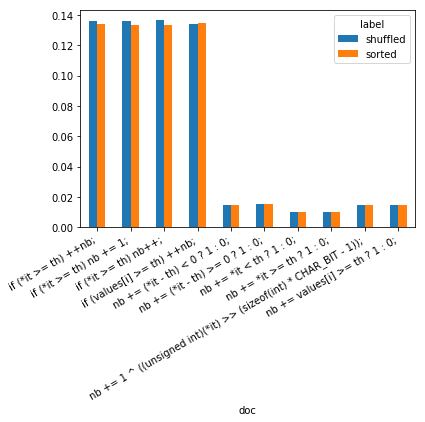

In [9]:
import seaborn
ax = dfg.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right');

It seems that inline tests (``cond ? value1 : value2``) do not stop the branching and it should be used whenever possible.

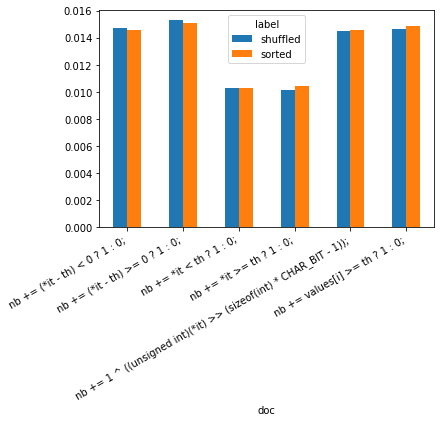

In [10]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('[?^]')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right');

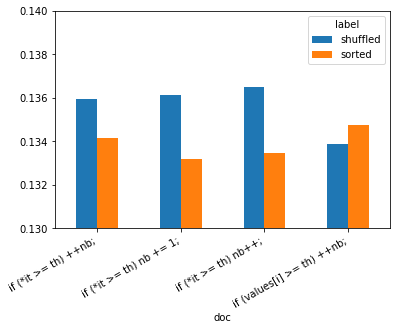

In [11]:
sdf = df[["doc", "label", "average"]]
dfg2 = sdf[sdf.doc.str.contains('if')].pivot("doc", "label", "average")
ax = dfg2.plot.bar(rot=30)
labels = [l.get_text() for l in ax.get_xticklabels()]
ax.set_xticklabels(labels, ha='right')
ax.set_ylim([0.13, 0.14]);

*sorted*, *not sorted* does not seem to have a real impact in this case. It shows *branching* really slows down the execution of a program. Branching happens whenever the program meets a loop condition or a test. Iterator ``*it`` are faster than accessing an array with notation ``[i]`` which adds a cost due to an extra addition.